# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [68]:
# Data manipulation
import pandas as pd
import numpy as np
import scipy
import vaex


# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import TransformedBbox
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = .8)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", serif="Helvetica Neue")

sb.set_style("white", rc=custom_style)
plt.rc('text', usetex=True)
plt.rc("text", usetex=False)

# only show last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"


# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [3]:
# import RMSD and rotseq id data
RMSD_seqid_df = pd.read_csv("data/rmsd_rotaseqid.txt", sep="\t")
RMSD_seqid_df.columns = ["PDB_id_1","PDB_id_2","rotaseq_id","RMSD","fullRMSD"]
RMSD_seqid_df.dropna(inplace=True)

In [4]:
RMSD_seqid_df.shape

(248, 5)

In [15]:
# import RAM55 annot dataset
in_filename = 'data/ALLFAMS_ROTA_counts_pre.hd5'
df = vaex.open(in_filename)# load vaex dataset
df.get_column_names()

['alignment_site',
 'PDB_id_1',
 'one_char_rota_1',
 'four_char_rota_1',
 'one_char_AA_1',
 'PDB_res_num_1',
 'PDB_chain_1',
 'DSSP_AA_1',
 'SS_DSSP_1',
 'EXP_DSSP_ASA_1',
 'EXP_DSSP_RASA_1',
 'PHI_DSSP_1',
 'PSI_DSSP_1',
 'NH_O_1_ENERGY_DSSP_1',
 'O_NH_1_ENERGY_DSSP_1',
 'NH_O_2_ENERGY_DSSP_1',
 'O_NH_2_ENERGY_DSSP_1',
 'HSE_ca_1',
 'ExposureCN_1',
 'three_char_AA_1',
 'PDB_id_2',
 'one_char_rota_2',
 'four_char_rota_2',
 'one_char_AA_2',
 'PDB_res_num_2',
 'PDB_chain_2',
 'DSSP_AA_2',
 'SS_DSSP_2',
 'EXP_DSSP_ASA_2',
 'EXP_DSSP_RASA_2',
 'PHI_DSSP_2',
 'PSI_DSSP_2',
 'NH_O_1_ENERGY_DSSP_2',
 'O_NH_1_ENERGY_DSSP_2',
 'NH_O_2_ENERGY_DSSP_2',
 'O_NH_2_ENERGY_DSSP_2',
 'HSE_ca_2',
 'ExposureCN_2',
 'three_char_AA_2',
 'pair_id',
 'tree_dist',
 'shared_rotaseq_identity',
 'ROTA_diff',
 'AA_diff',
 'fam_id',
 'comparison_type',
 'RASA_Tien_1',
 'RASA_Tien_2']

In [70]:
def calc_AA_diff(id1, id2):
    subset_1 = df[df.PDB_id_1.str.contains(id1) & df.PDB_id_2.str.contains(id2)]
    subset_2 = df[df.PDB_id_1.str.contains(id2) & df.PDB_id_2.str.contains(id1)]
    same_1 = len(subset_1[subset_1.AA_diff == False]) 
    same_2 = len(subset_2[subset_2.AA_diff == False]) 
    len_1 = len(subset_1)
    len_2 = len(subset_2)
    return (same_1 + same_2) / (len_1 + len_2) * 100

In [71]:
def calc_chi_diff(id1, id2):
    subset_1 = df[df.PDB_id_1.str.contains(id1) & df.PDB_id_2.str.contains(id2)]
    subset_2 = df[df.PDB_id_1.str.contains(id2) & df.PDB_id_2.str.contains(id1)]
    diff_1 = len(subset_1[(subset_1.AA_diff == False) & (subset_1.ROTA_diff == True)]) 
    diff_2 = len(subset_2[(subset_2.AA_diff == False) & (subset_2.ROTA_diff == True)]) 
    len_1 = len(subset_1)
    len_2 = len(subset_2)
    return 100 - ((diff_1 + diff_2) / (len_1 + len_2) * 100)

In [73]:
RMSD_seqid_df["aaseq_id"] = np.vectorize(calc_AA_diff)(RMSD_seqid_df['PDB_id_1'], RMSD_seqid_df['PDB_id_2'])
RMSD_seqid_df["chiseq_id"] = np.vectorize(calc_chi_diff)(RMSD_seqid_df['PDB_id_1'], RMSD_seqid_df['PDB_id_2'])
RMSD_seqid_df

PDB_id_1 PDB_id_2  rotaseq_id      RMSD  fullRMSD    aaseq_id  chiseq_id
1       1XZI     1XZB    0.967105  0.143465  0.143465   99.342105  97.368421
2       4UHA     5VVN    0.965636  0.190294  0.190294  100.000000  96.563574
3       2YVC     2D11    0.865979  1.035807  1.035807   99.364407  86.440678
4       1O7N     1O7G    0.980000  0.144536  0.144536  100.000000  98.000000
5       4RUL     1CY2    0.786517  1.901219  1.901219  100.000000  78.651685
..       ...      ...         ...       ...       ...         ...        ...
245     1QCI     1QCG    0.966851  0.195708  0.195708  100.000000  96.685083
246     4BQ5     4BQ3    0.943750  0.651709  0.651709   98.953975  96.443515
247     4BQ5     4BQ3    0.943750  0.651709  0.651709   98.953975  96.443515
248     2VUU     1K6X    0.912037  0.589104  0.589104  100.000000  91.203704
249     4OD4     4OD5    0.822967  0.552079  0.552079   99.832636  82.510460

[248 rows x 7 columns]

In [48]:
RMSD_seqid_df.aaseq_id.describe()

count    248.000000
mean      98.607126
std        2.772140
min       81.295547
25%       98.614112
50%       99.510165
75%      100.000000
max      100.000000
Name: aaseq_id, dtype: float64

In [5]:
# numer of structures
len(RMSD_seqid_df.PDB_id_1.unique())

244

In [6]:
RMSD_seqid_df.RMSD.quantile(.99)

6.238340970000001

In [7]:
RMSD_seqid_df.RMSD.quantile(.95)

2.3673685499999984

In [76]:
# remove RMSD outliers
q = .95
plot_df = RMSD_seqid_df[RMSD_seqid_df.RMSD < RMSD_seqid_df.RMSD.quantile(q)]
plot_df.dropna(inplace=True)
Y_rota = plot_df.rotaseq_id.apply(lambda x:x*100).values
Y_aa = plot_df.aaseq_id.values
Y_chi = plot_df.chiseq_id.values
X = plot_df.RMSD.values
data_dict = {"RMSD" : list(X) + list(X) + list(X),
                 "seq_id" : list(Y_aa) + list(Y_rota) + list(Y_chi),
                 "type" : ["AA"] * len(X) + ["ROTA"] * len(X) + ["chi_1"] * len(X)}
plot_df = pd.DataFrame.from_dict(data_dict)
plot_df.to_csv("data/RMSD_seqid.tsv", sep="\t")

# Results
Show graphs and stats here

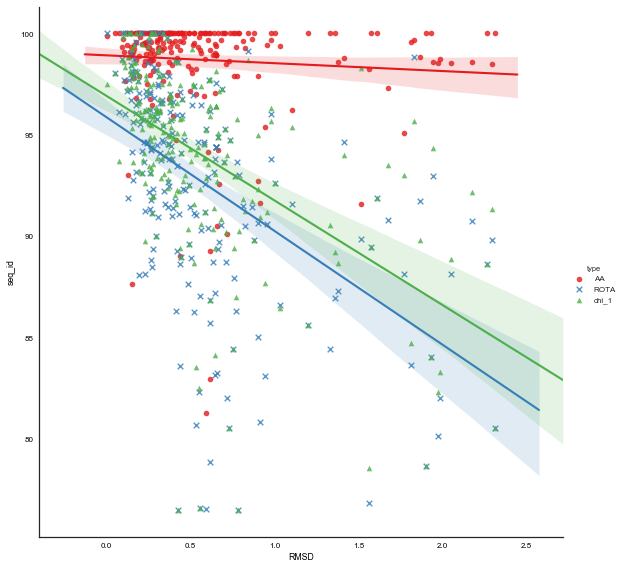

In [80]:
#fig, ax = plt.subplots(figsize=(8, 8))
#ax.set_ylim(-0.4, 2.7)
#ax.set_xlim(73, 101)

# calc Spearmann's rho
#rho, pval = scipy.stats.spearmanr(X, Y)
plot_df = pd.read_csv("data/RMSD_seqid.tsv", sep="\t")
g = sb.lmplot("RMSD", "seq_id",
           hue="type", data=plot_df,
           markers=["o", "x", "^"], height=8,
              palette="Set1")

# add rho, pval
#ax.text(.02, .03, r'$\rho$ = %.3f' %
#        (rho), fontsize=12, transform=ax.transAxes)
ax.invert_xaxis()
ax.set_ylabel("Sequence identity (\%)", fontsize=12)
ax.set_xlabel("RMSD (Å)", fontsize=12)

fig.savefig("figures/RAM55annot_RMSD_rotaseqid_regplot.pdf", format='pdf',
            bbox_inches='tight', dpi=fig.dpi)
plt.show()

# Conclusions and Next Steps
Summarize findings here